[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) hair color
(b) age
(c) number of siblings
(d) temperature

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [1]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

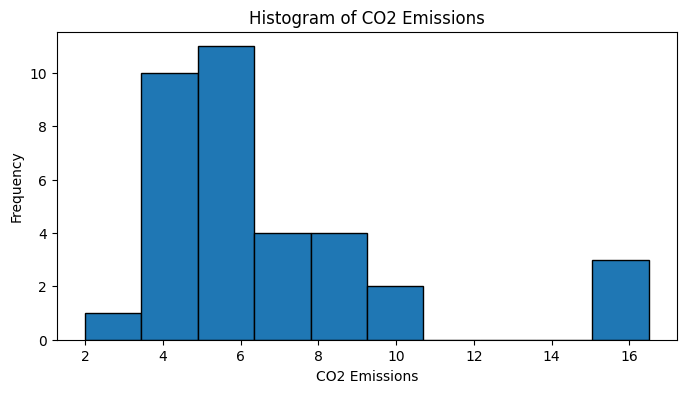

In [5]:
carbon_west.head(4)
plt.figure(figsize=(8,4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("CO2 Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [6]:
mean = np.mean(carbon_west["CO2"])
median = np.median(carbon_west["CO2"])
std = np.std(carbon_west["CO2"])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [7]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [11]:
no_dc  = murders.drop(murders.index[50])
no_dc_mean = np.mean(no_dc["murder"])
no_dc_median = np.median(no_dc["murder"])
no_dc_std = np.std(no_dc["murder"])

print(f"Mean without DC: {no_dc_mean}")
print(f"Median without DC: {no_dc_median}")
print(f"Standard Deviation without DC: {no_dc_std}")

Mean without DC: 4.874
Median without DC: 4.85
Standard Deviation without DC: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [12]:
no_dc_minimum = np.min(no_dc["murder"])
no_dc_q1 = np.percentile(no_dc["murder"], 25)
no_dc_q3 = np.percentile(no_dc["murder"], 75)
no_dc_maximum = np.max(no_dc["murder"])

# Display the five-number summary
print("Five Number Summary without DC")
print(f"Minimum: {no_dc_minimum}")
print(f"1st Quartile (Q1): {no_dc_q1}")
print(f"Median (Q2): {no_dc_median}")
print(f"3rd Quartile (Q3): {no_dc_q3}")
print(f"Maximum: {no_dc_maximum}")

Five Number Summary without DC
Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

The range was affected the most. The other stats stayed relatively similar but the max increased from 12.4 to 24.2

In [13]:
murders_mean = np.mean(murders["murder"])
murders_median = np.median(murders["murder"])

murders_minimum = np.min(murders["murder"])
murders_q1 = np.percentile(murders["murder"], 25)
murders_q3 = np.percentile(murders["murder"], 75)
murders_max = np.max(murders["murder"])

print("Stats WITH DC")
print(f"Mean: {murders_mean}")
print(f"Min: {murders_minimum}")
print(f"1st Quartile: {murders_q1}")
print(f"Median: {murders_median}")
print(f"3rd Quartile: {murders_q3}")
print(f"Max: {murders_max}")

Stats WITH DC
Mean: 5.252941176470588
Min: 1.0
1st Quartile: 2.6500000000000004
Median: 5.0
3rd Quartile: 6.45
Max: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [14]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

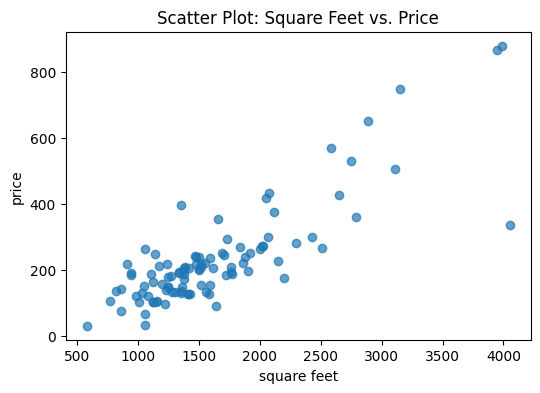

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('square feet')
plt.ylabel('price')

plt.show()

Part b. Find the correlation between the two variables.

In [18]:
corr = houses['size'].corr(houses['price'])
print(f'Correlation between Size and Price: {corr}')

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

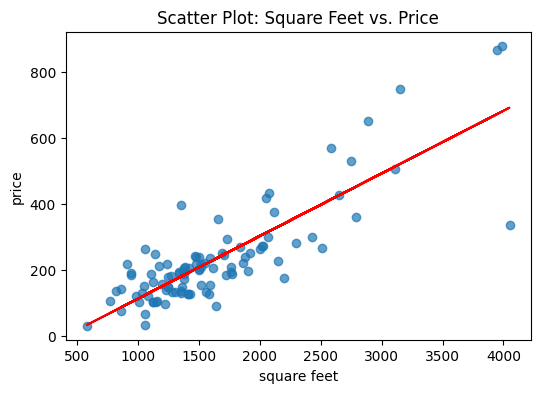

In [21]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()

model.fit(x,y)

slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)

plt.plot(x, model.predict(x), color='red')

plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('square feet')
plt.ylabel('price')

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

<Figure size 800x600 with 0 Axes>

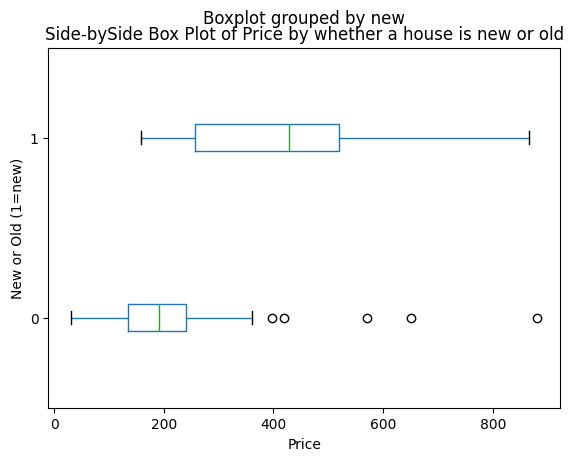

In [27]:

new_vs_old = houses.groupby('new')['price'].mean()
new_vs_old

plt.figure(figsize=(8,6))
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-bySide Box Plot of Price by whether a house is new or old')
plt.xlabel('Price')
plt.ylabel('New or Old (1=new)')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As the size of the home increases, so does the price. This can be seen in the scatter plot created as the regression line has a clearly positive slope.

The relationship between price and whether or not a house is new is not as straightforward but seems to follow a similar trend. New homes have a higher min, q1, median, and q3 which means, in general, new homes are more expensive. However, there are some old homes that are very expensive but these are shown as outliers in the box plot.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [28]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [34]:
happy.head(5)
# pd.crosstab(happy["happiness",happy["marital"]])

,subject,happiness,marital,gender
0,1,1 1,male,NaN
1,2,1 1,male,NaN
2,3,1 1,male,NaN
3,4,1 1,male,NaN
4,5,1 1,male,NaN


For some reason the data file isn't being read in correctly but I wrote the code above that should work if the data file was read in correctly.